# Contents:
* [1. Import Libraries & Data](#import-libraries)
* [2. Explorotary Data Analysis (EDA)](#eda)
* [3. Data Preprocessing](#data-preprocessing)
* [4. Models Experiments](#models)

<a id="import-libraries"></a>
# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# models 
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from lightgbm import LGBMRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# evaluation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('./data/processed/properties.csv')

In [3]:
data.head()

,set,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,Texpi,Skin thicknessj,logJmaxm
0,t,139.10,1.91,387.0,-4.000000,-2.090000,1.0,4.0,298.0,0.100,-6.250000
1,t,171.03,2.92,270.0,-5.586217,-2.666217,0.0,0.0,305.0,0.128,-7.478245
2,t,171.03,2.92,270.0,-5.586217,-2.666217,0.0,0.0,305.0,0.075,-7.131337
3,t,108.10,1.04,258.0,-3.397940,-2.357940,1.0,1.0,298.0,0.100,-5.620000
4,t,184.27,3.67,183.0,-6.185314,-2.515314,0.0,2.0,305.0,0.128,-8.009659


In [4]:
data.shape

(446, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   set              446 non-null    object 
 1   MWa              446 non-null    float64
 2   logKowb          446 non-null    float64
 3   Mptc             446 non-null    float64
 4   LogSaqd          446 non-null    float64
 5   LogSoce          446 non-null    float64
 6   Hdf              446 non-null    float64
 7   Hag              446 non-null    float64
 8   Texpi            446 non-null    float64
 9   Skin thicknessj  446 non-null    float64
 10  logJmaxm         446 non-null    float64
dtypes: float64(10), object(1)
memory usage: 38.5+ KB


In [6]:
data.isna().sum()

set                0
MWa                0
logKowb            0
Mptc               0
LogSaqd            0
LogSoce            0
Hdf                0
Hag                0
Texpi              0
Skin thicknessj    0
logJmaxm           0
dtype: int64

In [7]:
data.columns

Index(['set', 'MWa', 'logKowb', 'Mptc', 'LogSaqd', 'LogSoce', 'Hdf', 'Hag',
       'Texpi', 'Skin thicknessj', 'logJmaxm'],
      dtype='object')

We are going to use these features:
- `set`, `MWa`, `logKowb`, `Mptc`, `LogSaqd`, `LogSoce`, `Hdf`, `Hag`, `Texpi`, `Skin`, `thicknessj`   
- our dependant variable is `logJmaxm`.

- Use one hot encoding for `set`.

<a id="eda"></a>
# 2. EDA 

In [8]:
data['set'].value_counts()

t     418
t*     28
Name: set, dtype: int64

In [9]:
data.describe()

,MWa,logKowb,Mptc,LogSaqd,LogSoce,Hdf,Hag,Texpi,Skin thicknessj,logJmaxm
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,219.000408,1.637578,388.484641,-5.112279,-3.474726,1.753363,3.116592,305.688341,0.095776,-7.734816
std,102.304418,2.040348,99.352703,1.799958,1.384633,1.577133,2.160908,4.476074,0.021997,1.885531
min,32.000000,-4.670000,147.000000,-10.036208,-7.710959,0.000000,0.000000,295.000000,0.010000,-12.997493
25%,130.100000,0.730000,315.500000,-6.207608,-4.310008,1.000000,2.000000,305.000000,0.100000,-9.012389
50%,192.185000,1.760000,425.000000,-5.414500,-3.596254,2.000000,3.000000,305.000000,0.100000,-7.828758
75%,313.194993,3.142607,454.000000,-3.886057,-2.381251,2.000000,4.000000,310.000000,0.100000,-6.291720
max,504.400000,7.730000,573.000000,-1.240312,0.021162,11.000000,16.000000,312.000000,0.128000,-3.887336


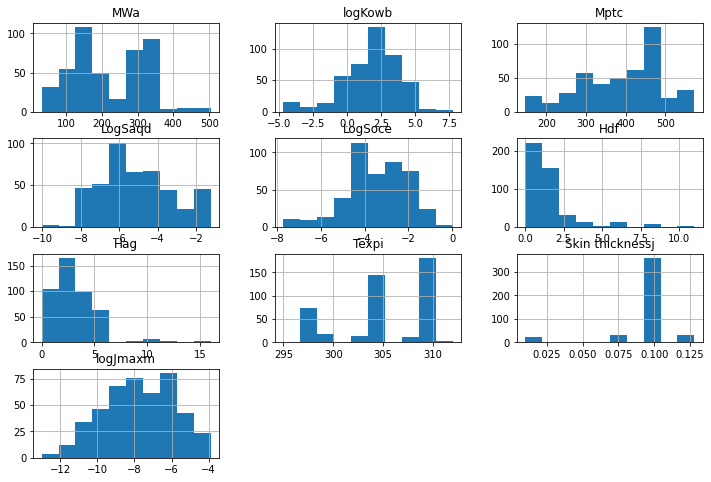

In [10]:
data.hist(figsize=(12, 8));

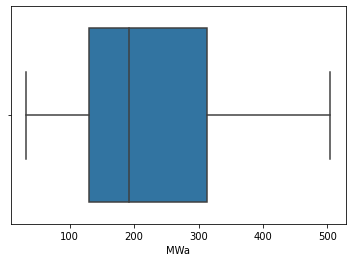

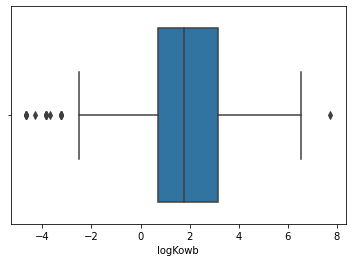

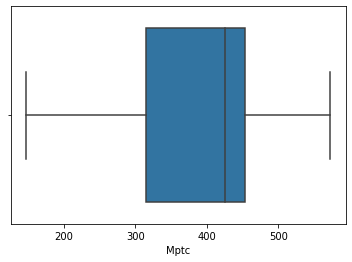

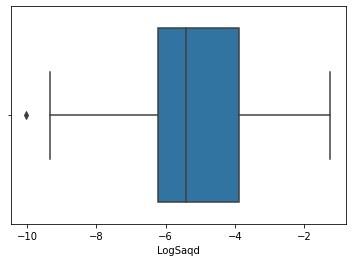

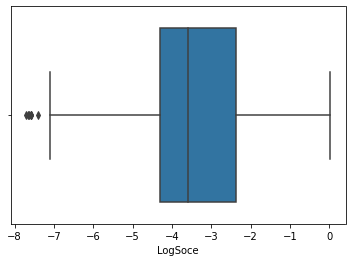

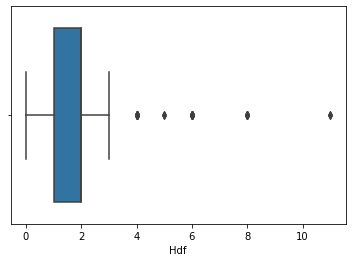

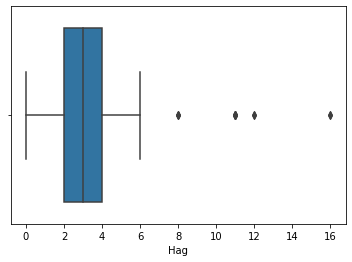

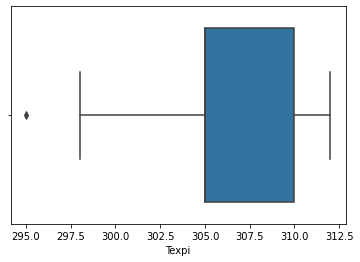

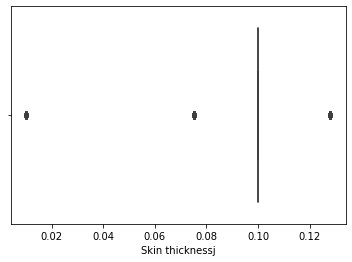

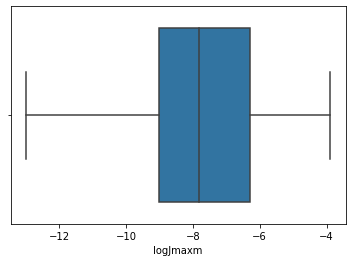

In [11]:
for col in data.columns:
    if col == "set":
        continue
    else:
        sns.boxplot(x=data[col])
        plt.show();

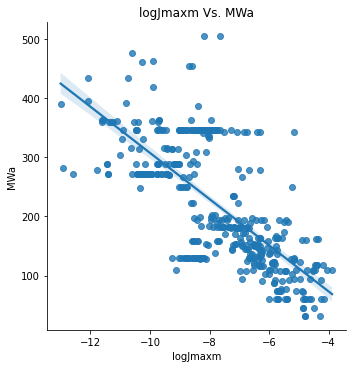

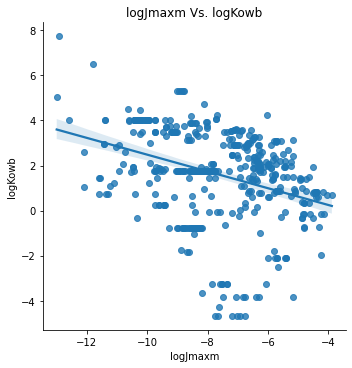

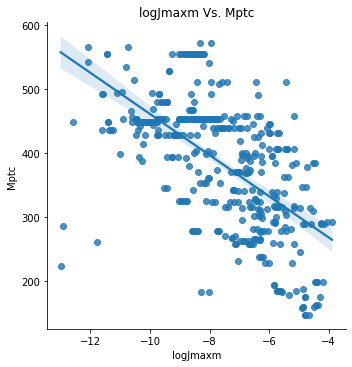

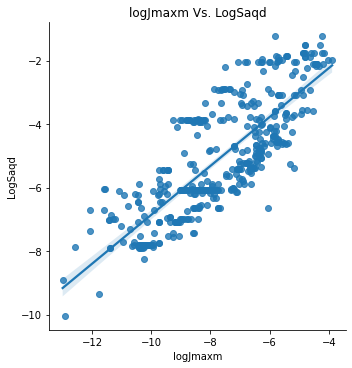

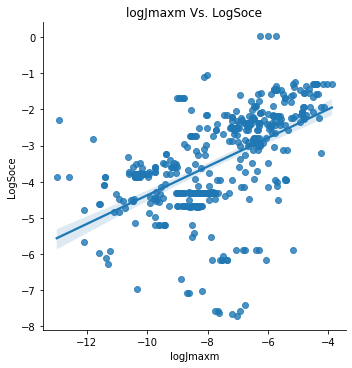

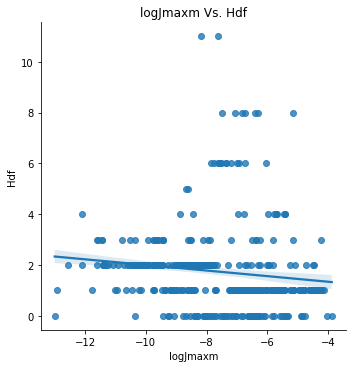

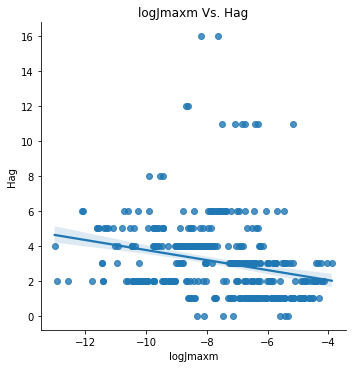

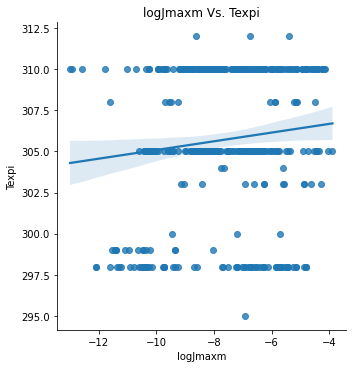

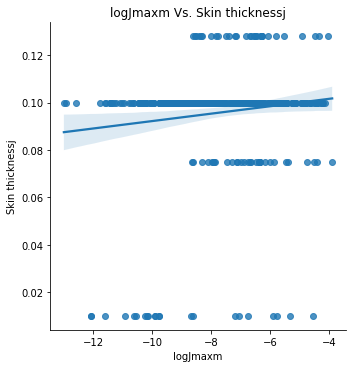

In [12]:
for col in data.columns:
    # excluding these columns
    if col == "set" or col == "logkpl" or col == "logJmaxm":
        continue
    
    #plt.figure(figsize=(20, 8))
    ax = sns.lmplot(data=data, x='logJmaxm', y=col)
    plt.title("logJmaxm Vs. {}".format(col))
    plt.show();

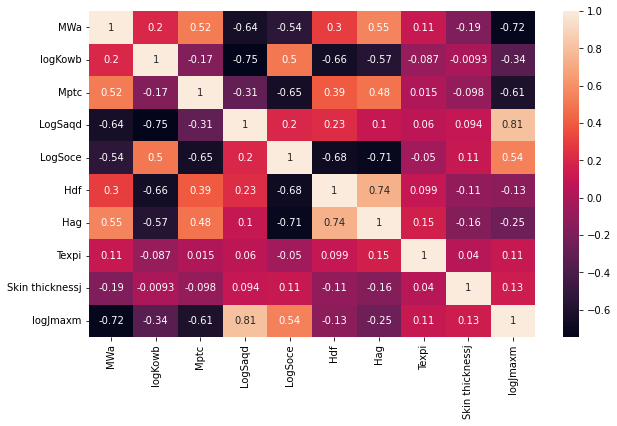

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True);

<a id="data-preprocessing"></a>
# 3. Data Preprocessing

In [77]:
model_data = data.copy()

# encoding set column
ohe = OneHotEncoder()
model_data['set'] = ohe.fit_transform(model_data['set'].values.reshape(-1, 1)).toarray()

In [143]:
X = model_data.drop(["logJmaxm"], axis=1)
y = model_data['logJmaxm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (379, 10) 	 Shape of y_train: (379,)
Shape of X_test: (67, 10) 	 Shape of y_test: (67,)


In [151]:
from mlxtend.feature_selection import SequentialFeatureSelector

backward_feature_selector = SequentialFeatureSelector(CatBoostRegressor(allow_writing_files=False, verbose=0),
                                                        k_features=(1, 10), #
                                                        forward=False, 
                                                        floating=False,
                                                        verbose=2,
                                                        cv=0).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    6.5s finished

[2022-12-24 13:42:46] Features: 9/1 -- score: 0.9838415906084166[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.7s finished

[2022-12-24 13:42:52] Features: 8/1 -- score: 0.9836650742025116[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.0s finished

[2022-12-24 13:42:57] Features: 7/1 -- score: 0.983485425674758[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [152]:
selected_features = list(backward_feature_selector.k_feature_names_)
selected_features#['set','MWa','logKowb','Mptc','LogSaqd','LogSoce','Hdf','Texpi','Skin thicknessj]

['set',
 'MWa',
 'logKowb',
 'Mptc',
 'LogSaqd',
 'LogSoce',
 'Hdf',
 'Texpi',
 'Skin thicknessj']

In [153]:
backward_feature_selector.k_score_

0.9838415906084166

In [154]:
pd.DataFrame.from_dict(backward_feature_selector.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",[0.9837102757460294],0.98371,"(set, MWa, logKowb, Mptc, LogSaqd, LogSoce, Hd...",NaN,0.0,NaN
9,"(0, 1, 2, 3, 4, 5, 6, 8, 9)",[0.9838415906084166],0.983842,"(set, MWa, logKowb, Mptc, LogSaqd, LogSoce, Hd...",NaN,0.0,NaN
8,"(0, 1, 2, 3, 4, 5, 8, 9)",[0.9836650742025116],0.983665,"(set, MWa, logKowb, Mptc, LogSaqd, LogSoce, Te...",NaN,0.0,NaN
7,"(1, 2, 3, 4, 5, 8, 9)",[0.983485425674758],0.983485,"(MWa, logKowb, Mptc, LogSaqd, LogSoce, Texpi, ...",NaN,0.0,NaN
6,"(1, 3, 4, 5, 8, 9)",[0.9832468301350018],0.983247,"(MWa, Mptc, LogSaqd, LogSoce, Texpi, Skin thic...",NaN,0.0,NaN
5,"(3, 4, 5, 8, 9)",[0.98259981296576],0.9826,"(Mptc, LogSaqd, LogSoce, Texpi, Skin thicknessj)",NaN,0.0,NaN
4,"(4, 5, 8, 9)",[0.979811206982488],0.979811,"(LogSaqd, LogSoce, Texpi, Skin thicknessj)",NaN,0.0,NaN
3,"(4, 5, 8)",[0.9755379264162479],0.975538,"(LogSaqd, LogSoce, Texpi)",NaN,0.0,NaN
2,"(4, 5)",[0.966466227873815],0.966466,"(LogSaqd, LogSoce)",NaN,0.0,NaN
1,"(4,)",[0.9224055390392343],0.922406,"(LogSaqd,)",NaN,0.0,NaN


<a id="models"></a>
# 4. Models Experiments

In [155]:
X = model_data[selected_features]
y = model_data['logJmaxm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print("Shape of X_train: {} \t Shape of y_train: {}".format(X_train.shape, y_train.shape))
print("Shape of X_test: {} \t Shape of y_test: {}".format(X_test.shape, y_test.shape))

Shape of X_train: (379, 9) 	 Shape of y_train: (379,)
Shape of X_test: (67, 9) 	 Shape of y_test: (67,)


In [156]:
def evaluate_model(model_df, i, model_name, model, X, y, X_train, X_test, y_train, y_test):
    """
    this function is for regression takes the model with the data and calculate
    the scores, with cross validation techniques, in addition to MAE, MSE, RMSE, MAPE
    R Squared and Adjusted R Squared

    :param model: model
    :param X_train, X_test, y_train, y_test: data that was used
    """
    # scores with train and test data
    # print("All Data Score: {}".format(model.score(X, y)))
    # print("Train Score: {}".format(model.score(X_train, y_train)))
    # print("Test Score: {}\n".format(model.score(X_test, y_test)))

    # cross validation with 5 folds
    all_cv_5 = cross_val_score(model, X, y, cv=5)
    print("all CV 5: {}".format(all_cv_5))
    # print("Mean Cross-Validation score: {}".format(all_cv_5.mean()))

    # predictions from our model
    predictions = model.predict(X_test)

    # MAE, MAPE, MSE, RMSE
    # print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
    # print("MAPE: {}".format(mean_absolute_percentage_error(y_test, predictions)))
    # print("MSE: {}".format(mean_squared_error(y_test, predictions)))
    # print("RMSE: {}\n".format(np.sqrt(mean_squared_error(y_test, predictions))))

    # calculating R squared and Adjusted R squared
    r_sqre = r2_score(y_test, predictions)
    n = len(y_test)
    p = X_test.shape[1] # number of independant features

    Adj_r2 = 1-(1-r_sqre)*(n-1)/(n-p-1)
    
    # print("R Squared: {}".format(r_sqre))
    # print("Adjusted R Squared: {}".format(((1 - r_sqre)* (N-1)) / (N-K-1)))
    
    train_mae = mean_absolute_error(y_train, model.predict(X_train))
    test_mae = mean_absolute_error(y_test, predictions)

    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, predictions)

    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, predictions))

    


    print("=" * 40)
    model_df.loc[i] = [model_name, all_cv_5.mean(), train_mae,
                    test_mae, mean_absolute_percentage_error(y_test, predictions),
                    train_mse ,test_mse, train_rmse, test_rmse, r_sqre, Adj_r2]

    return model_df

In [157]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                     ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                      ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                     ("dt", DecisionTreeRegressor())])

pipeline_rf = Pipeline([("scalar4", StandardScaler()),
                     ("rf", RandomForestRegressor())])

pipeline_kn = Pipeline([("scalar5", StandardScaler()),
                     ("kn", KNeighborsRegressor())])

pipeline_xgb = Pipeline([("scalar6", StandardScaler()),
                     ("xgb", XGBRegressor())])

pipeline_gbr = Pipeline([("scalar7", StandardScaler()),
                     ("gbr", GradientBoostingRegressor())])

pipeline_eln = Pipeline([("scalar8", StandardScaler()),
                     ("eln", ElasticNet())])

pipeline_sgdr = Pipeline([("scalar9", StandardScaler()),
                     ("sgdr", SGDRegressor())])

pipeline_br = Pipeline([("scalar10", StandardScaler()),
                     ("br", BayesianRidge())])

pipeline_cat = Pipeline([("scalar11", StandardScaler()),
                     ("cat", CatBoostRegressor(allow_writing_files=False, verbose=0))])

pipeline_lgbm = Pipeline([("scalar12", StandardScaler()),
                     ("lgmb", LGBMRegressor())])



# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr,
            pipeline_eln, pipeline_sgdr, pipeline_br, pipeline_cat, pipeline_lgbm] # 

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor",
                7: "Elastic Net", 8: "SGDRegressor", 9:"BayesianRidge", 10: "CatBoostRegressor", 11: "LGBMRegressor"}
    #, 

models_scores_df = pd.DataFrame(columns=["model", "Mean CV", "MAE Train", "MAE Test",
                                         "MAPE", "MSE Train", "MSE Test", "RMSE Train",
                                          "RMSE Test", "R_Squared", "Adjusted_R_Squared"])


# Fit the pipelines and display the scores with Cross validation
for i, pipe in enumerate(pipelines):
    # getting the name of our model
    model_name = pipeline_dict[i]
    print(model_name)
    
    # fitting our data
    pipe.fit(X_train, y_train)
    
    evaluate_model(models_scores_df, i, model_name, pipe, X, y, X_train, X_test, y_train, y_test)

LinearRegression
all CV 5: [0.74348067 0.61524915 0.18185842 0.8143316  0.7044705 ]
Lasso
all CV 5: [-0.13919265  0.16320498 -2.22414858  0.45489823 -0.14276368]
DecisionTree
all CV 5: [0.70504025 0.70515587 0.40033066 0.56856833 0.68945374]
RandomForest
all CV 5: [0.81776615 0.70408388 0.28115265 0.72341318 0.83709723]
KNeighbors
all CV 5: [0.68504955 0.76120569 0.22851637 0.70038398 0.73467227]
XGBRegressor
all CV 5: [0.83294232 0.75540502 0.62375663 0.83779    0.84781533]
GradientBoostingRegressor
all CV 5: [0.83102541 0.71553022 0.55932671 0.77519253 0.83225434]
Elastic Net
all CV 5: [ 0.29498439  0.48372831 -1.37512458  0.67248382  0.43198809]
SGDRegressor
all CV 5: [0.73404023 0.60127    0.13435337 0.8195837  0.72039815]
BayesianRidge
all CV 5: [0.74210945 0.6120924  0.16157132 0.81860083 0.71081929]
CatBoostRegressor
all CV 5: [0.84187273 0.83380405 0.5780395  0.84327569 0.8645564 ]
LGBMRegressor
all CV 5: [0.81543719 0.79771025 0.57800422 0.73987177 0.85156349]


In [158]:
models_scores_df

,model,Mean CV,MAE Train,MAE Test,MAPE,MSE Train,MSE Test,RMSE Train,RMSE Test,R_Squared,Adjusted_R_Squared
0,LinearRegression,0.611878,0.567436,0.696212,0.098757,0.527852,0.702676,0.726534,0.838258,0.815198,0.786018
1,Lasso,-0.377600,1.242438,1.345889,0.188234,2.179132,2.556946,1.476188,1.599045,0.327528,0.221348
2,DecisionTree,0.613710,0.082852,0.425162,0.060778,0.036477,0.451448,0.190988,0.671899,0.881270,0.862523
3,RandomForest,0.672703,0.184101,0.409937,0.057049,0.069656,0.378453,0.263924,0.615185,0.900468,0.884752
4,KNeighbors,0.621966,0.405653,0.492076,0.068307,0.306259,0.503829,0.553407,0.709809,0.867494,0.846572
5,XGBRegressor,0.779542,0.088490,0.397880,0.055587,0.036574,0.363833,0.191244,0.603186,0.904313,0.889204
6,GradientBoostingRegressor,0.742666,0.234614,0.416612,0.056403,0.099142,0.353014,0.314868,0.594149,0.907158,0.892499
7,Elastic Net,0.101612,0.951950,1.052457,0.144513,1.341301,1.641446,1.158146,1.281189,0.568303,0.500140
8,SGDRegressor,0.601929,0.573137,0.692204,0.098002,0.534468,0.700716,0.731073,0.837088,0.815713,0.786615
9,BayesianRidge,0.609039,0.572641,0.696281,0.098530,0.533203,0.705522,0.730207,0.839954,0.814449,0.785151


In [159]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 7
    height = 8
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)

    plt.show()
    plt.close()

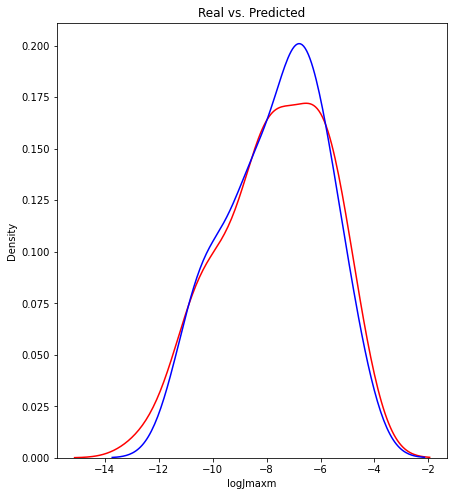

In [160]:
predictions = pipeline_cat.predict(X_test)
DistributionPlot(y_test, predictions, "Real", "Predicted", "Real vs. Predicted")

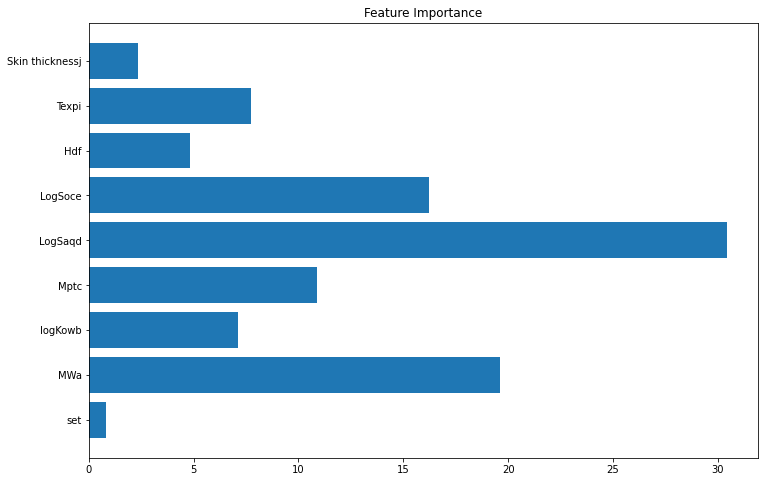

In [161]:
# # get feature importance
importance = pipeline_cat['cat'].feature_importances_

# plot feature importance
plt.figure(figsize=(12, 8))
plt.barh([x for x in X.columns], importance)
plt.title('Feature Importance')
plt.show()

# 5. Hyperparameter Tuning

In [102]:
eval_metric = "neg_mean_absolute_percentage_error"

In [103]:
GBR = GradientBoostingRegressor()

parameters = {'learning_rate': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
                'subsample'    : [0.9, 0.5, 0.2, 0.1],
                'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10]
                }

grid_GBR = RandomizedSearchCV(estimator=GBR, param_distributions=parameters, cv=5, n_jobs=-1, scoring=eval_metric)
grid_GBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=500,
                          subsample=0.1)

 The best score across ALL searched params:
 -0.05332046492697127

 The best parameters across ALL searched params:
 {'subsample': 0.1, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01}


In [104]:
RFR = RandomForestRegressor()

parameters = {'n_estimators' : [100,500,1000, 1500],
                'max_depth'    : [4,6,8,10],
                'criterion': ["squared_error", "absolute_error"],
                'max_features': ["auto", "sqrt", "log2"],
            }

grid_RFR = RandomizedSearchCV(estimator=RFR, param_distributions=parameters, cv=5, n_jobs=-1, scoring=eval_metric)
grid_RFR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_RFR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_RFR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_RFR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=1500)

 The best score across ALL searched params:
 -0.055281186917948276

 The best parameters across ALL searched params:
 {'n_estimators': 1500, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'squared_error'}


In [105]:
XGB = XGBRegressor()

parameters = {
        'min_child_weight': [1, 5, 10], #50, 100
        'gamma': [0.5, 1, 2], #1.5 5
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 6, 9], # 4, 5, 8, 10
        'learning_rate': [0.001, 0.05, 0.01, 0.15],  # 0.2 0.001
        'n_estimators': [100, 500, 500] # 300 1000
        }

grid_XGB = RandomizedSearchCV(estimator=XGB, param_distributions=parameters, cv=5, n_jobs=-1, scoring=eval_metric)
grid_XGB.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_XGB.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_XGB.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_XGB.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

 The best score across ALL searched params:
 -0.055833845453026755

 The best parameters across ALL searched params:
 {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.15, 'gamma': 1, 'colsa

In [111]:
CBR = CatBoostRegressor(allow_writing_files=False, verbose=0)

parameters = {
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 6, 9], # 4, 5, 8, 10
        'learning_rate': [0.001, 0.05, 0.01, 0.15],  # 0.2 0.001
        'n_estimators': [100, 500, 500] # 300 1000
        }

grid_CBR = RandomizedSearchCV(estimator=CBR, param_distributions=parameters, cv=5, n_jobs=-1, scoring=eval_metric)
grid_CBR.fit(X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_CBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_CBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_CBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 -0.055283444911851186

 The best parameters across ALL searched params:
 {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.05}


In [91]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10, input_shape=[10]))
model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')

In [92]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2)

Epoch 1/300
12/12 - 1s - loss: 17773.7148 - val_loss: 967.4893 - 1s/epoch - 113ms/step
Epoch 2/300
12/12 - 0s - loss: 15201.9404 - val_loss: 795.0051 - 79ms/epoch - 7ms/step
Epoch 3/300
12/12 - 0s - loss: 13639.3438 - val_loss: 714.8043 - 113ms/epoch - 9ms/step
Epoch 4/300
12/12 - 0s - loss: 13535.9883 - val_loss: 666.2584 - 163ms/epoch - 14ms/step
Epoch 5/300
12/12 - 0s - loss: 13137.5293 - val_loss: 665.9255 - 178ms/epoch - 15ms/step
Epoch 6/300
12/12 - 0s - loss: 10572.3633 - val_loss: 546.3154 - 169ms/epoch - 14ms/step
Epoch 7/300
12/12 - 0s - loss: 9552.0088 - val_loss: 557.8103 - 165ms/epoch - 14ms/step
Epoch 8/300
12/12 - 0s - loss: 8885.0586 - val_loss: 495.0725 - 223ms/epoch - 19ms/step
Epoch 9/300
12/12 - 0s - loss: 7787.0366 - val_loss: 428.5459 - 182ms/epoch - 15ms/step
Epoch 10/300
12/12 - 0s - loss: 6508.9658 - val_loss: 398.8904 - 168ms/epoch - 14ms/step
Epoch 11/300
12/12 - 0s - loss: 6482.9097 - val_loss: 367.2913 - 172ms/epoch - 14ms/step
Epoch 12/300
12/12 - 0s - los

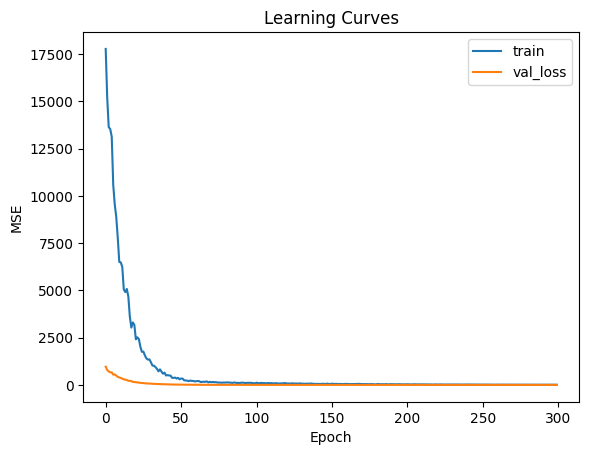

In [94]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [95]:
predictions = model.predict(X_test)

# MAE, MSE, RMSE
print("MAE: {}".format(mean_absolute_error(y_test, predictions)))
print("MSE: {}".format(mean_squared_error(y_test, predictions)))
print("RMSE: {}\n".format(mean_squared_error(y_test, predictions, squared=False)))

3/3 [==============================] - 0s 6ms/step
MAE: 1.2094342897858261
MSE: 2.7120901040476375
RMSE: 1.6468424648543762



In [22]:
X_train.columns

Index(['MWa', 'logKowb', 'Mptc', 'LogSaqd', 'LogSoce', 'Hdf', 'Hag', 'MVh',
       'Texpi', 'Skin thicknessj'],
      dtype='object')